# EEG feeling emotions

<a href="https://colab.research.google.com/drive/1uHlS2GPhqjeEn1hAN_8pgxZpO9LQr5Nw?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author:** Lifeng Qiu Lin


## 1. Environment
---
Before hands on, get the **tools** 🧰 ready!

### 1.1 Import!

To import the tools (libraries) we need, run the following command.

In [1]:
# @title [RUN] Import libraries
import torch, pandas, numpy, os, requests, zipfile, io, matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset


### 1.2 Turn on the **GPU**!

To use the GPU (which makes code run faster), in the top left corner:
- Click on *Edit*
- Click on *Notebook settings*
- From the drop down menu in *Hardware accelerator*
- Select **GPU**
- Save

Ready? Check whether GPU is ready by running the following code. The output should be `Using cuda.`, via which GPU is used.

In [2]:
# @title [SHIFT + ENTER = RUN] Use GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}.")

Using cuda.


### 1.3 Locate


Find a place to play around, let's create a folder called `EEG` and we build everything inside it. The result should be `/content/EEG folder`.

In [3]:
# @title [RUN] Create and get to `EEG` folder
! mkdir -p /content/EEG
%cd /content/EEG/


/content/EEG


## 2. Data
---
Bring up the data✨, and let's see what it is made of!

### 2.1 Download the data
The result data stored in `/content/EEG/data/emotions.csv`.

In [4]:
# @title [RUN] Download the eeg data
! mkdir -p ./data
! wget -q -O ./data/emotions.csv https://github.com/UOMDSS/workshops-2022-2023/raw/main/semester-1/Week-7-EEG-Feeling-Emotions-Logistic-Regression/data/emotions.csv
! ls


data


### 2.2 Read data
Now that we have the data in a folder, we read it into our notebook environment. *The cells that you are working right now is in a thingy called "notebook".*

In [5]:
# @title [RUN] Read csv file
data = pandas.read_csv("./data/emotions.csv")
data

,mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


We see *mean*, some omitted columns, *fft*, *label*.
This notebook shallowly explores the data, to better understand what is meant with each row and column, refer to the dataset.
For example, the "a" and "b" in the end refers to whether the source of data is from person "a" or person "b".



### 2.3 Understand data
What is inside of this dataset? Dimensions? Type? What data can be useful?

In [6]:
# @title [RUN] Print data about the data
print(data.shape)
print(data.columns)
# for (i, col) in enumerate(data.columns):
#   print(i, col)
print(data.describe())

(2132, 2549)
Index(['mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)
          mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.

> ***Side notes***: fft stands for Fast Fourier Transform. This data enables us to represent a kind of *wave* graphs (time domain signals i.e. time vs amplitude) to another kind of *wave* graphs (frequency vs amplitude)。
> The main point here is that **we can visualize that!**

### 2.4 Visualise data
FFT columns represents elaborated signals, therefore, let's plot that brain signal as a graph.

In [7]:
# @title [RUN] [Tweakable] Extract fft data
# ranges is tweakable
start = 0 #@param {type:"integer"}
end = 749 #@param {type:"integer"}
ranges = [(f"fft_{start}_a", f"fft_{end}_a"), ("label", "label")]
fft_data = pandas.concat([data.loc[:, i:j] for i, j in ranges], axis = 1) [data["label"] != "NEUTRAL"].reset_index()
fft_data

,index,fft_0_a,fft_1_a,fft_2_a,fft_3_a,fft_4_a,fft_5_a,fft_6_a,fft_7_a,fft_8_a,...,fft_741_a,fft_742_a,fft_743_a,fft_744_a,fft_745_a,fft_746_a,fft_747_a,fft_748_a,fft_749_a,label
0,0,-520.0,398.000,-201.00,-201.00,398.000,-52.2,121.0,-64.00,-64.00,...,26.40,-12.90,-12.90,26.40,-474.00,442.0,-222.00,-222.00,442.0,NEGATIVE
1,2,-90.8,204.000,-77.10,-77.10,204.000,-488.0,415.0,-187.00,-187.00,...,631.00,-261.00,-261.00,631.00,-86.40,176.0,-100.00,-100.00,176.0,POSITIVE
2,3,119.0,6.250,10.90,10.90,6.250,-333.0,283.0,-144.00,-144.00,...,439.00,-221.00,-221.00,439.00,272.00,-87.7,32.40,32.40,-87.7,POSITIVE
3,6,142.0,-0.608,-35.90,-35.90,-0.608,19.7,-13.2,-57.60,-57.60,...,-54.80,-33.40,-33.40,-54.80,162.00,-44.1,51.00,51.00,-44.1,POSITIVE
4,7,-32.5,165.000,-55.80,-55.80,165.000,577.0,-320.0,143.00,143.00,...,-327.00,89.90,89.90,-327.00,-248.00,272.0,-135.00,-135.00,272.0,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2124,-399.0,387.000,-213.00,-213.00,387.000,-52.9,165.0,-58.90,-58.90,...,339.00,-94.40,-94.40,339.00,270.00,-41.1,45.20,45.20,-41.1,NEGATIVE
1412,2126,-55.1,2.860,-87.80,-87.80,2.860,58.8,13.6,2.58,2.58,...,-2.17,1.71,1.71,-2.17,4.38,11.2,-5.29,-5.29,11.2,POSITIVE
1413,2128,-127.0,261.000,-106.00,-106.00,261.000,-530.0,445.0,-196.00,-196.00,...,476.00,-241.00,-241.00,476.00,-22.50,169.0,-80.70,-80.70,169.0,POSITIVE
1414,2129,-440.0,302.000,-156.00,-156.00,302.000,-248.0,276.0,-117.00,-117.00,...,282.00,-125.00,-125.00,282.00,295.00,-149.0,32.10,32.10,-149.0,NEGATIVE


Now the data size has been reduced to:
- 1416 rows
- 752 columns
Why?

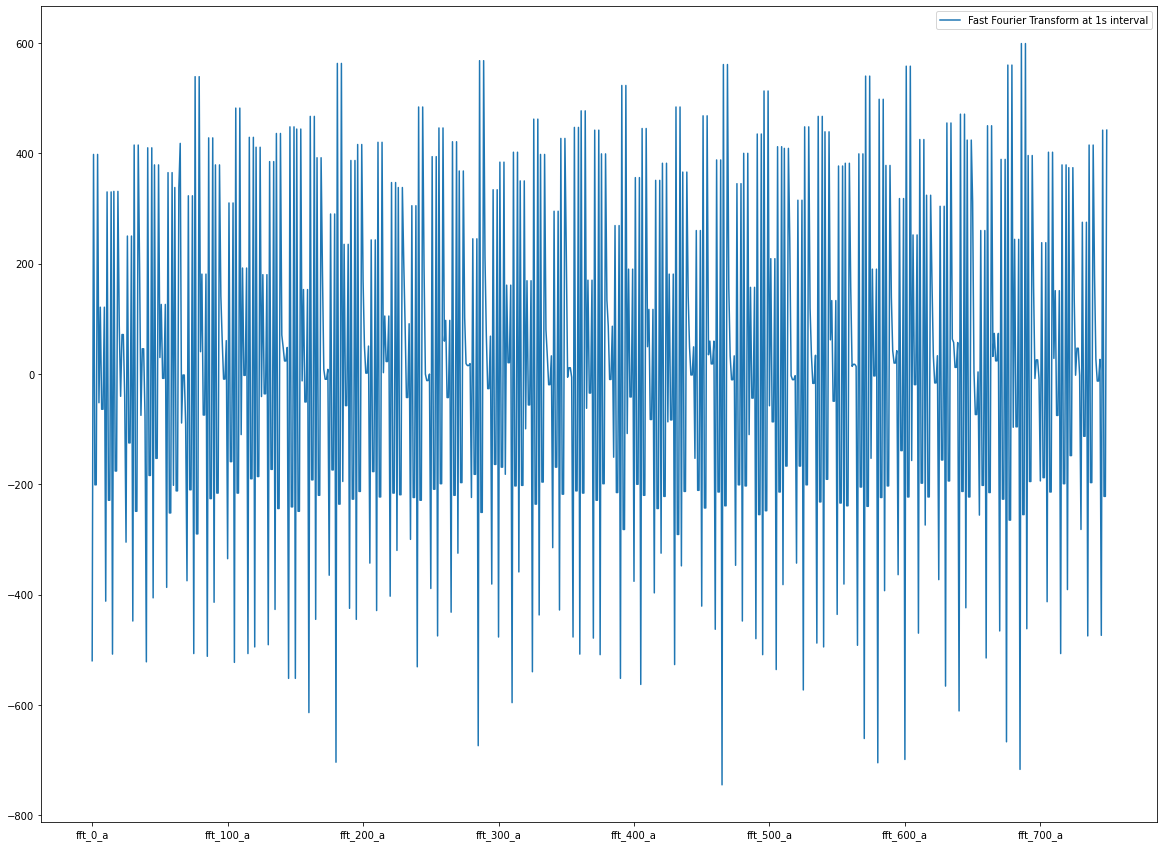

In [8]:
# @title [RUN] [Tweakable] Plot fft brain signals
# moment (row) is tweakable
moment = 0 #@param {type:"integer"}
fft_data.iloc[moment, 1:-1].plot(figsize=(20, 15), label="Fast Fourier Transform at 1s interval")
plt.legend()

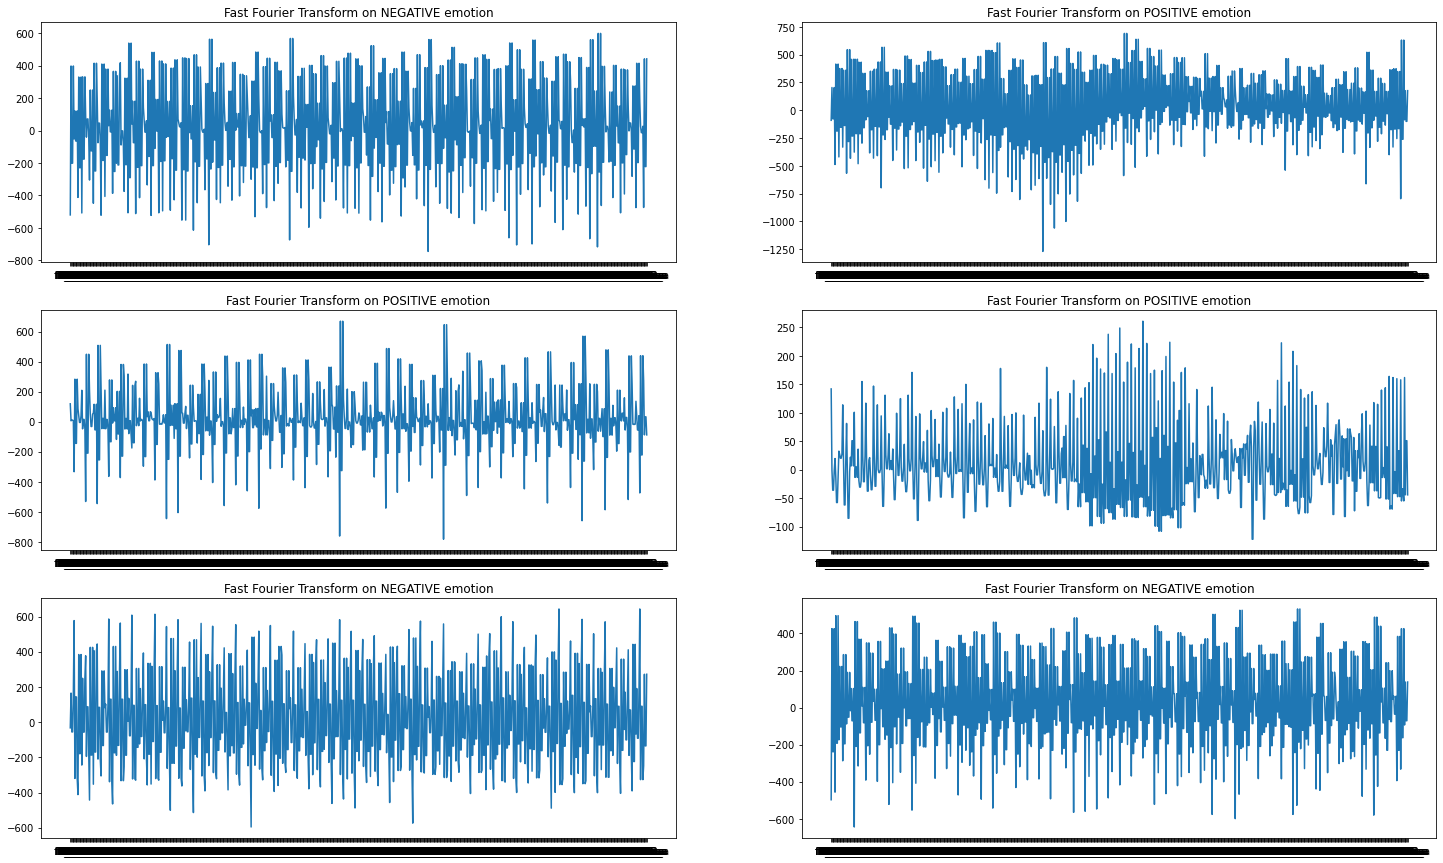

In [9]:
# @title [RUN] Brain signals over time
# be patient, this cell takes about 30-40 seconds to run!
fig = plt.figure(figsize=(25, 15))
for i in range(0, 6):
    plt.subplot(3, 2, i+1)
    plt.plot(fft_data.iloc[i, 1:-1])
    plt.title("Fast Fourier Transform on " + fft_data.loc[i, "label"] + " emotion")

By eye, how would you say the differences between positive and negative brain signals?

## 3. Create model
---
Now it is time to write the **logistic regression** model ​⚒️!


> ***Side notes***: we can if we want, write the step-by-step code of the model. But most of the times, we tend to use a *frameworks* (code), a prepared codebase that already has the skeleton of model. They are handy and easy to use.  
> This notebook uses [**PyTorch**](https://pytorch.org/), a framework like this

### 3.1 Dataset class
Imagine the datasets as spare data which could come in any form, how can PyTorch handle each case?  
The answer is that it **doesn't** handle, we as users are the ones responsible to moderate the data according to PyTorch **dataset interface**.  
The following code is out of scope of this workshop. Just run it and should be fine, although you can have a look if interested.

In [10]:
# @title [RUN] Define emotion dataset in PyTorch
class EmotionDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.data = df
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data.iloc[index, :-1].values.astype(numpy.float64)
        y = self.data.iloc[index, -1]
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            y = self.target_transform(y)
        return x, y


### 3.2 Model class
We aim to predict the emotion with a **logistic regression**, don't we?  
Luckily, PyTorch is able to help you to write this model incredibly fast.

> ***Side notes***:   
  - `torch.nn.Linear(x, y)` maps `x` to `y` in a regression line.  
  - `torch.sigmoid(x)` computes the value of x after applying sigmoid function


In [11]:
# @title [RUN] Build Logistic Regression model
class EmotionLogisticRegressionModel(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(EmotionLogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

## 4. Train model
---
The most intense part (for computers) comes now! We train 🏋 the model.

### 4.1. Hyperparameters
Different from the "parameters" which is obtained after training, "hyperparameters" are values that we humans choose to affect the model globally.  
For example, choosing `cuda`, `GPU` as our hardware resource you can consider it as a kind of "hyperparameter".

In [12]:
# @title [RUN] [Tweakable] Choose hyperparameters
fft_start = 0 #@param {type:"integer"}
fft_end = 20 #@param {type:"integer"}
ranges = [(f"fft_{fft_start}_a", f"fft_{fft_end}_a"), (f"fft_{fft_start}_b", f"fft_{fft_end}_b"), ("label", "label")]
train_proportion = 0.8 #@param {type:"slider", min: 0, max: 1, step: 0.05}
batch_size = 64 #@param {type:"integer"}
learning_rate = 0.01 #@param {type:"number"}
epochs = 30 #@param {type:"integer"}

### 4.2 Create train and test cycles
One last thing before training the model, is to wrap all the train cycle and test cycle as a "function" (function is just a block of code, callable with the name of the function). This gives us more concise and readable code.  
You don't need to fully understand what is going on inside, as it has some complex concepts. But feel free to ask if you want to know it.

In [13]:
# @title [RUN] Create train cycle
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [14]:
# @title [RUN] Create test cycle
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X,y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)

            test_loss += loss_fn(pred, y).item()
            correct += (pred == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: Accuracy: {100*(correct):>0.1f}%, Avg loss: {test_loss:>8f} \n\n")


### 4.3 Train
Finally! The following cell initialises the model and trains the model. Learning the data may take some time, please be patient. Same, some functions are specific to PyTorch, you don't need to fully understand them. Have a guess, what do they mean?

In [15]:
# @title [RUN] Initialise
# Create dataset
data = pandas.read_csv("./data/emotions.csv")
data = pandas.concat([data.loc[:, i:j] for i, j in ranges], axis=1)[data["label"] != "NEUTRAL"].reset_index()
input_size = data.shape[1] - 1
output_size = 1
dataset = EmotionDataset(data, transform=lambda x: torch.from_numpy(x).float(), target_transform=lambda x: torch.tensor([1]).float() if x == "POSITIVE" else torch.tensor([0]).float())
train_size = int(train_proportion * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Create model
model = EmotionLogisticRegressionModel(input_size, output_size).to(device)

# Loss and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
# @title [RUN] Train model!
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 59.797626  [    0/ 1132]
Test Error: Accuracy: 82.4%, Avg loss: 15.039557 


Epoch 2
-------------------------------
loss: 11.319773  [    0/ 1132]
Test Error: Accuracy: 83.1%, Avg loss: 14.849117 


Epoch 3
-------------------------------
loss: 8.475166  [    0/ 1132]
Test Error: Accuracy: 84.5%, Avg loss: 13.397240 


Epoch 4
-------------------------------
loss: 15.750788  [    0/ 1132]
Test Error: Accuracy: 84.9%, Avg loss: 14.111486 


Epoch 5
-------------------------------
loss: 18.962902  [    0/ 1132]
Test Error: Accuracy: 80.6%, Avg loss: 17.268883 


Epoch 6
-------------------------------
loss: 17.187500  [    0/ 1132]
Test Error: Accuracy: 78.9%, Avg loss: 18.484591 


Epoch 7
-------------------------------
loss: 16.581200  [    0/ 1132]
Test Error: Accuracy: 74.3%, Avg loss: 24.442543 


Epoch 8
-------------------------------
loss: 20.419861  [    0/ 1132]
Test Error: Accuracy: 83.5%, Avg loss: 13.658974 


Epoch 9
---------

## 5. Test model
---
Finished! Now we can try this model out!  
Choose one intance of the data, and then the model will predict it. Does the prediction match with the actual emotion?

In [ ]:
# @title [RUN] Use model!
# From 0 to 1415
chosen_data_index = 10 #@param {type:"integer"}
chosen_data = data.iloc[chosen_data_index, :-1]
prediction = model(torch.tensor(chosen_data.values.astype(numpy.float32)).to(device))
print(f"""
      Model's prediction: {'POSITIVE' if prediction[0] == 1 else 'NEGATIVE'}
      Actual emotion: {data.iloc[chosen_data_index, -1]}
      """)

fft_data.iloc[chosen_data_index, 1:-1].plot(figsize=(20, 15), label="Fast Fourier Transform")
plt.legend()